In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("articles_preprocess.xls")
data.drop('id', axis = 1, inplace= True)
data

,title,texts,date,tag
0,британский сми запрещать писать новость мужчин...,британский министерство информация принимать д...,"Октябрь 7, 2020",society
1,ненецкий автономный округ быть жить конституци...,несмотря отрицательный результат голосование о...,"Июль 3, 2020",society
2,минприроды обсуждать введение платный посещени...,специалист минприроды обсуждать коллега мвд мч...,"Декабрь 2, 2019",society
3,heroes три запрещать сша изза отсутствие транс...,онлайндистрибьютер компьютерный игра включая s...,"Февраль 1, 2020",society
4,подмосковный черноголовка строиться частный тю...,сми обсуждаться инициатива создание россия час...,"Ноябрь 21, 2019",society
...,...,...,...,...
4988,китайский министр объяснять почему пожимать ру...,китайский министр развитие высокий технология ...,"Февраль 11, 2019",politics
4989,действие краснодарский казак заставлять прохож...,правоохранительный орган заявлять находить пра...,"Ноябрь 29, 2020",society
4990,пьяный финн пытаться пересекать российскофинск...,сразу два пять нетрезвый финн обнаруживать рос...,"Ноябрь 17, 2019",society
4991,томский полицейский православный ученый попыта...,томский область правоохранительный орган возбу...,"Декабрь 3, 2019",science


In [3]:
data['tag'].value_counts()

society      3160
politics     1282
economics     278
science       264
books           9
Name: tag, dtype: int64

In [4]:
titles = [item[1][0] for item in data.iterrows()]
texts = [item[1][1] for item in data.iterrows()]

In [5]:
import artm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
def lda(texts):
    cv = CountVectorizer()
    n_wd = np.array(cv.fit_transform(texts).todense()).T
    vocabulary = cv.get_feature_names()
    
    bv = artm.BatchVectorizer(data_format='bow_n_wd',
                              n_wd=n_wd,
                              vocabulary=vocabulary)
    
    model = artm.LDA(num_topics=5, dictionary=bv.dictionary)
    
    model.fit_offline(bv, num_collection_passes=20)
    
    return model.get_top_tokens()

c:\users\semav\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
def word_cloud(tokens):
    for i in range(len(tokens)):
        plt.figure(figsize=(15,10))
        plt.imshow(WordCloud().generate(' '.join(tokens[i])))
        plt.axis('off')
        plt.title(f'Topic {i}', fontdict = {'fontsize' : 64})
        plt.show()

c:\users\semav\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
top_tokens_titles = lda(titles)
top_tokens_texts = lda(texts)

c:\users\semav\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
print("Titles:")
for i in range(len(top_tokens_titles)):
    print(f'{i}: {top_tokens_titles[i]}')
print("Texts:")
for i in range(len(top_tokens_texts)):
    print(f'{i}: {top_tokens_texts[i]}')

Titles:
0: ['россия', 'госдума', 'предлагать', 'запрещать', 'появляться', 'суд', 'изза', 'американский', 'первый', 'депутат']
1: ['пять', 'трамп', 'рубль', 'лукашенко', 'белоруссия', 'коронавирус', 'русский', 'сша', 'российский', 'россиянин']
2: ['россия', 'становиться', 'конституция', 'изза', 'победа', 'день', 'новый', 'потребовать', 'поправка', 'проводить']
3: ['россиянин', 'президент', 'москва', 'российский', 'быть', 'новый', 'принимать', 'объявлять', 'область', 'московский']
4: ['ноль', 'два', 'один', 'год', 'россия', 'девять', 'российский', 'вводить', 'три', 'четыре']
Texts:
0: ['ноль', 'один', 'который', 'два', 'год', 'это', 'человек', 'пять', 'ученый', 'время']
1: ['президент', 'один', 'ноль', 'свой', 'два', 'который', 'год', 'это', 'сша', 'наш']
2: ['который', 'один', 'свой', 'это', 'россия', 'человек', 'год', 'ноль', 'два', 'суд']
3: ['ноль', 'два', 'один', 'год', 'который', 'город', 'новый', 'пять', 'россия', 'наш']
4: ['ноль', 'один', 'два', 'год', 'россия', 'пять', 'страна'

c:\users\semav\appdata\local\programs\python\python37\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


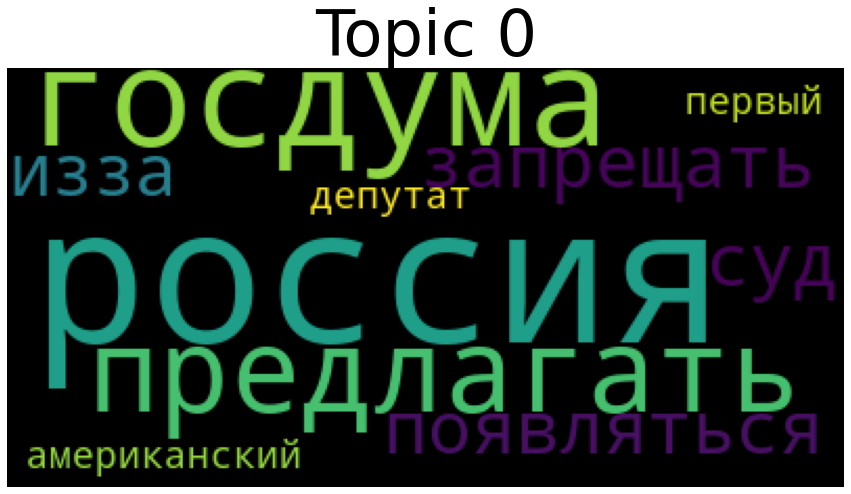

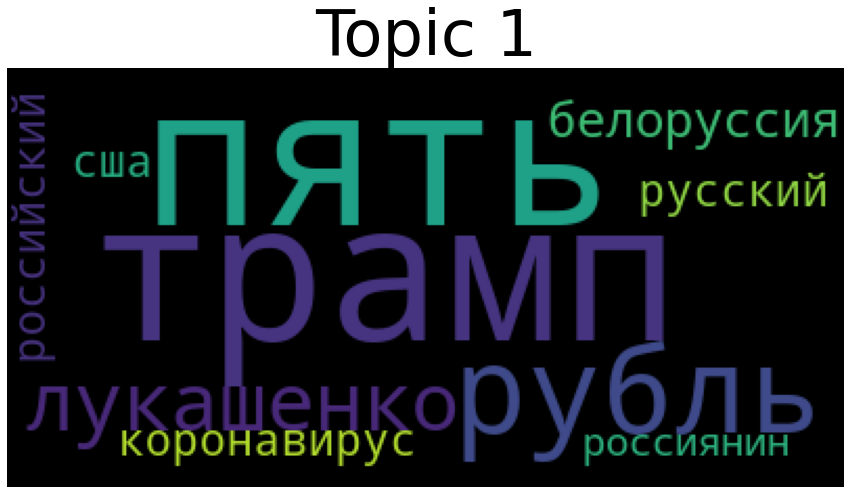

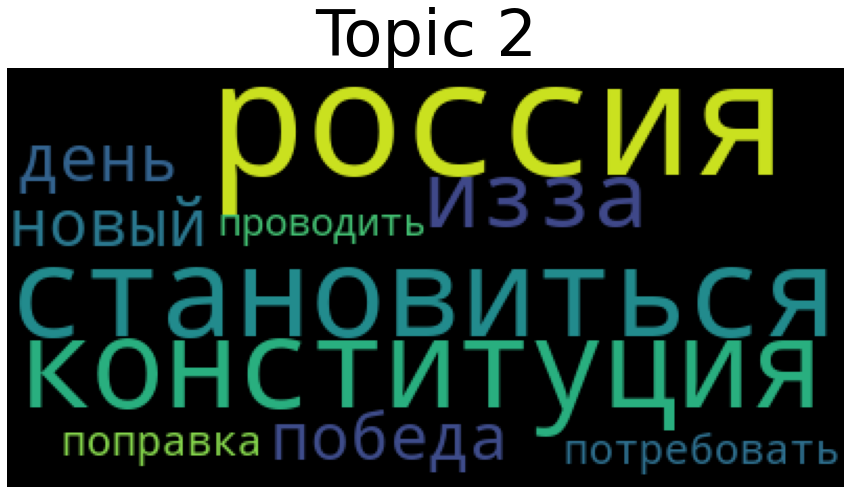

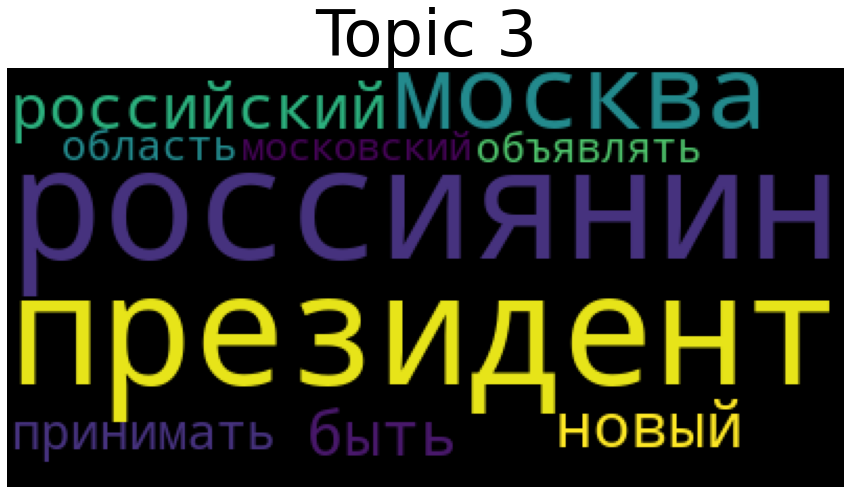

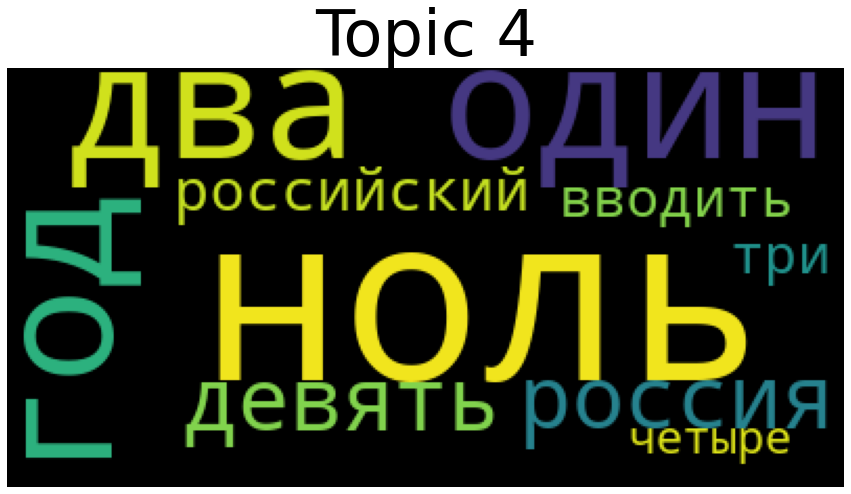

In [14]:
word_cloud(top_tokens_titles)

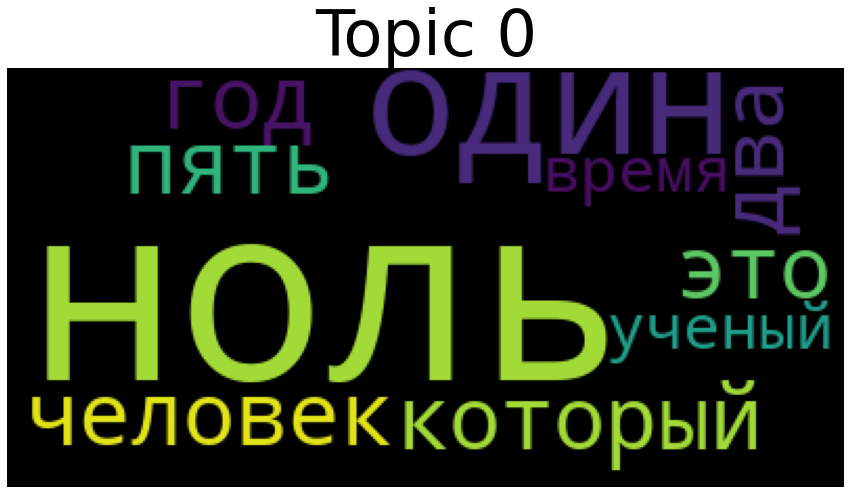

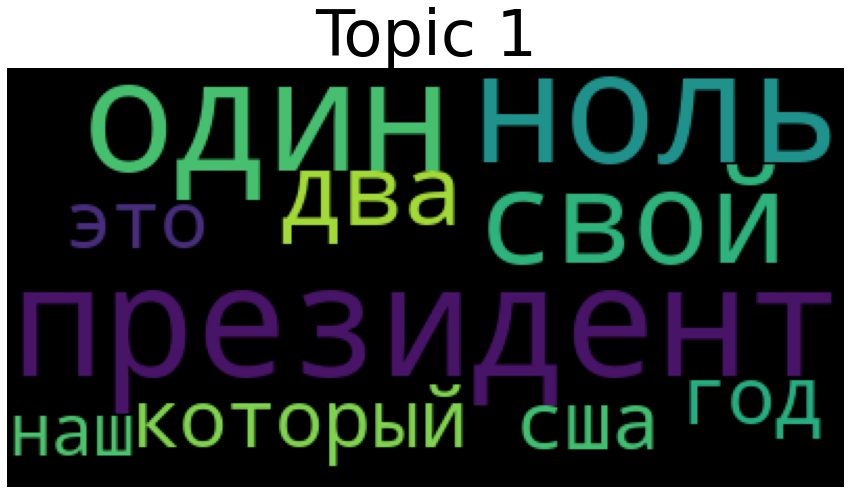

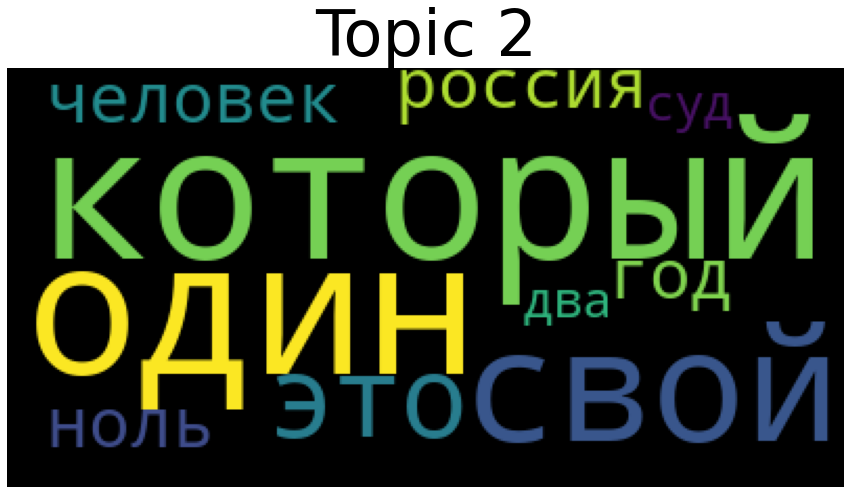

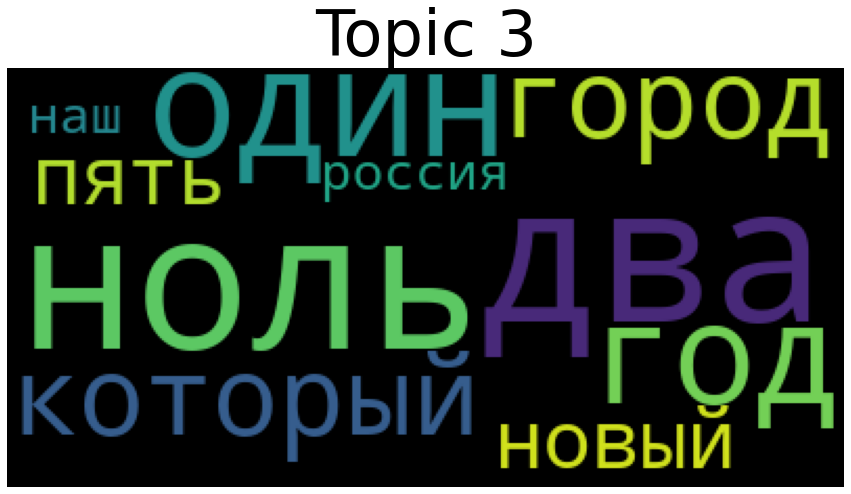

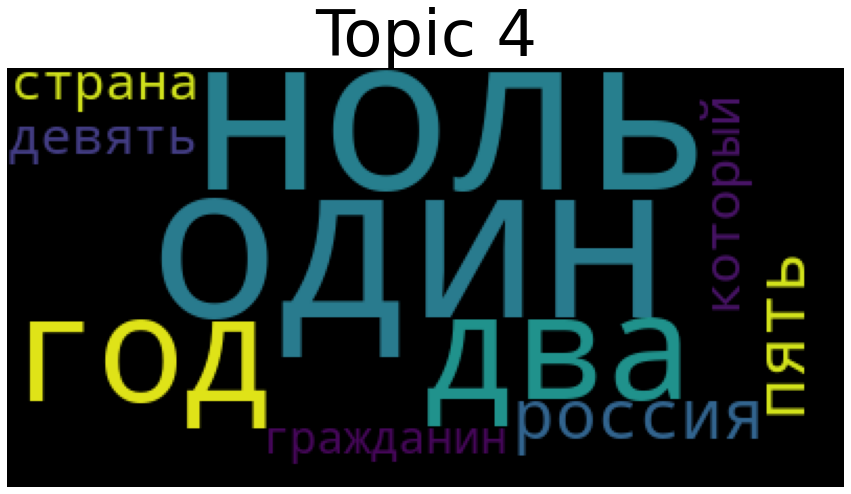

In [15]:
word_cloud(top_tokens_texts)